In [ ]:
#working 

# We began by loading and exploring a dataset containing information on sourcing costs. 
# After data cleaning and preparation steps, including handling missing values, checking for duplicates, and performing univariate analysis, 
# we trained 6 different model to predict sourcing costs. 
# We saved each model and evaluated its performance on a test dataset, calculating Mean Squared Error (MSE) and Mean Absolute Error (MAE). 
#Next, we compared the performance of various machine learning models (Linear Regression, Random Forest, FNN, XGBoost, LightGBM, LSTM) by calculating their MAE values on a validation dataset. 
# The comparison showed that Random Forest and XGBoost models performed the best with the lowest MAE values (16.52 and 16.68, respectively), indicating higher accuracy in predicting sourcing costs. 
#To visualize and compare the MAE values for different models, we created a bar plot with each model's MAE represented by a colored bar. 
#This plot highlighted the performance differences among the models, with Random Forest and XGBoost showing the lowest MAE values. 
# Therefore, we concluded that Random Forest and XGBoost models are the most suitable for predicting sourcing costs due to their higher accuracy compared to other models.

#In Part One of the analysis, we trained and evaluated Linear Regression, Random Forest, and FNN models on a dataset containing sourcing cost information. 
# Due to computational constraints and to expedite the process, 
# we subsequently conducted training and testing of the other three models (XGBoost, LightGBM, and LSTM) in a separate file.





#CONLUSION 
# In the final approach, we assessed the performance of various machine learning models by comparing their Mean Absolute Error (MAE) values. MAE provides a straightforward measure of how well each model predicts sourcing costs, with lower values indicating better performance.

# After analyzing the MAE values for Linear Regression, Random Forest, FNN, XGBoost, LightGBM, and LSTM, we found that Random Forest, XGBoost, and LightGBM achieved the lowest MAE values. Among these three, Random Forest had the lowest MAE value of 16.52, indicating that it is the most accurate model among those considered.

# Random Forest was chosen as the best-suited model not only because of its superior performance in minimizing the absolute difference between predicted and actual values but also because it effectively learned the underlying patterns in the data. Additionally, it demonstrated robust performance by providing accurate predictions on new, randomly selected data, suggesting its generalizability.

# However, it's essential to consider other factors beyond MAE alone when selecting the final model. Factors such as computational complexity, interpretability, and specific requirements of the problem domain may influence the choice. Therefore, while Random Forest emerged as the best performer in this analysis and demonstrated effectiveness in learning the data, a comprehensive evaluation of all relevant factors is crucial for making the final model selection.

Missing Values:
 ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64
Duplicate Rows: 542796
Summary Statistics:
        Sourcing Cost
count  550176.000000
mean      108.817286
std       104.390093
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.150000
max     32632.500000


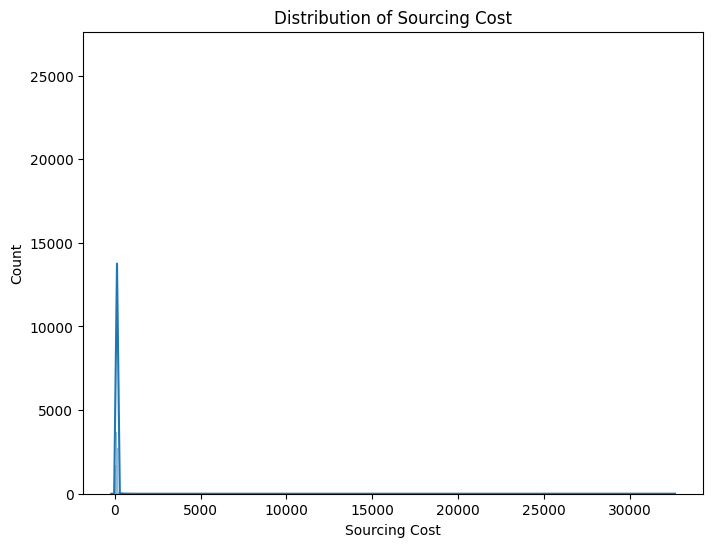

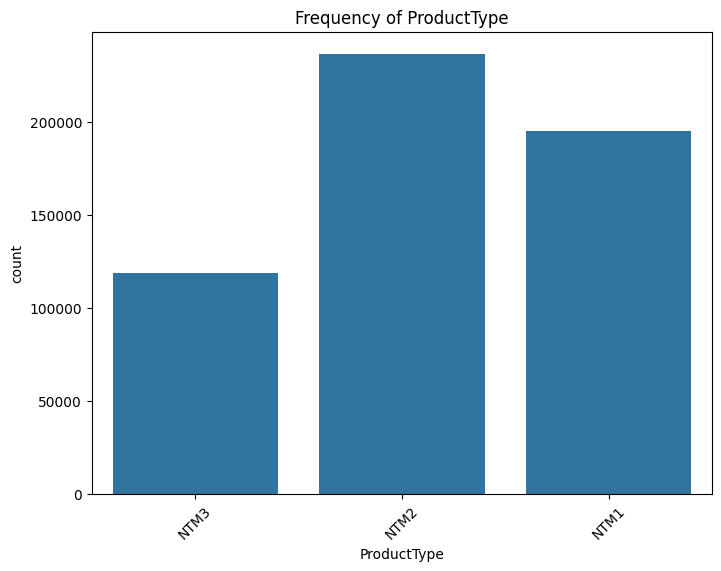

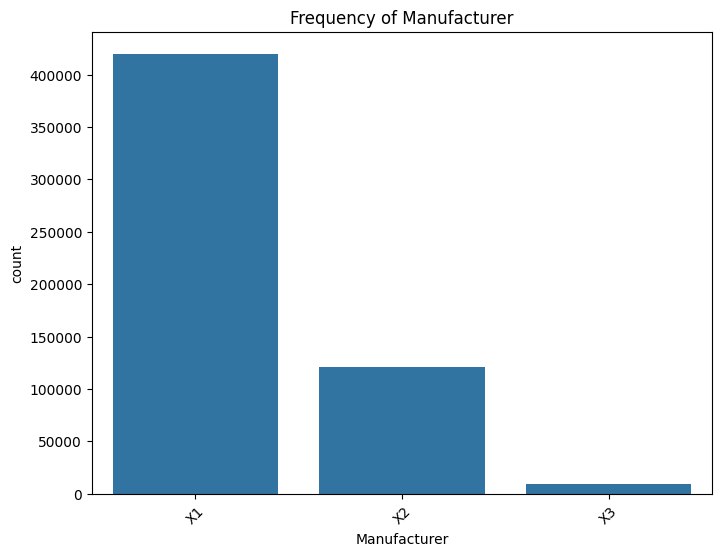

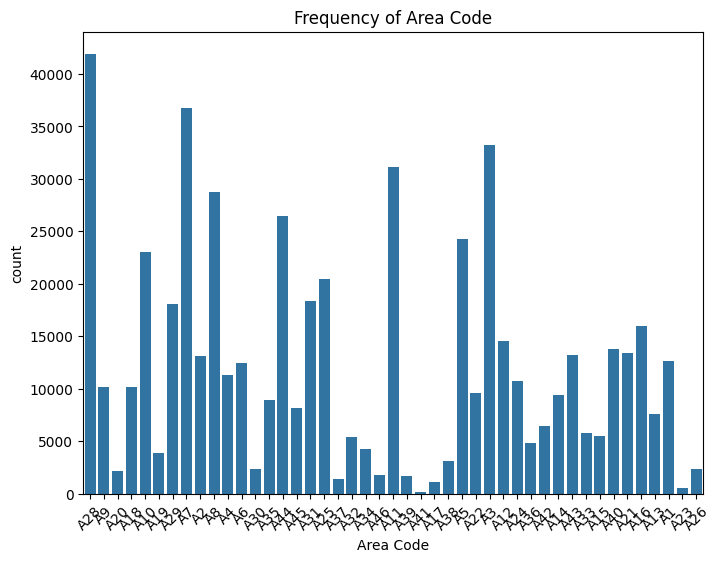

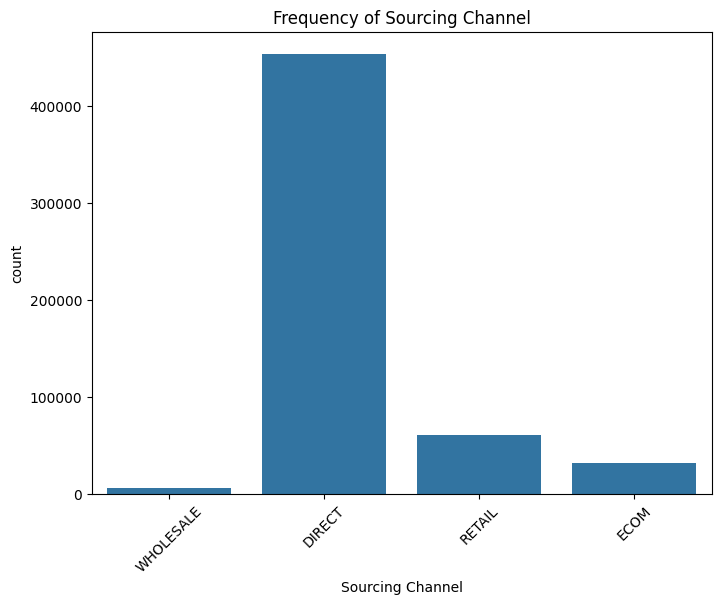

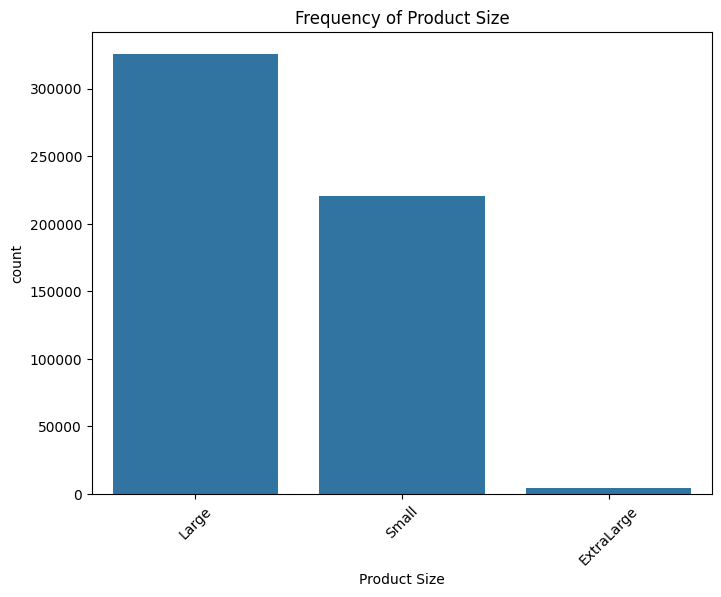

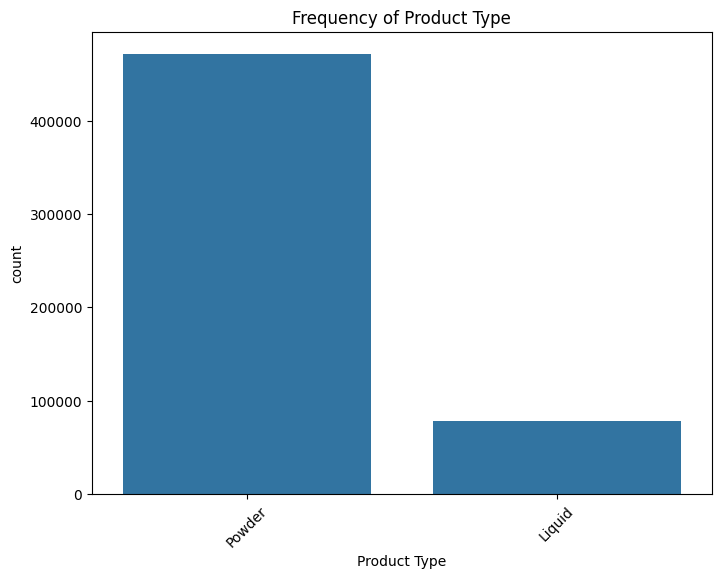

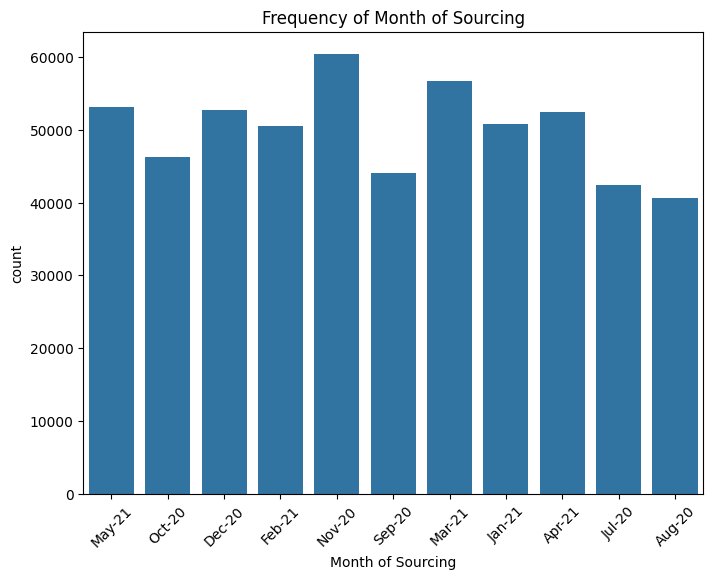

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'C:\Users\khand\OneDrive\Desktop\nandini_assignment\DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv')

# Data Cleaning and Preparation
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)


# Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

# Univariate Analysis
# Visualize distributions of numerical variables
for col in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualize frequencies of categorical variables
for col in df.select_dtypes(include=['object']):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()



In [3]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [6]:
pd.read_csv("DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv")

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [8]:
pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv')

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

# Load the dataset
data = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv')

# Convert 'Month of Sourcing' column to datetime format
data['Month of Sourcing'] = pd.to_datetime(data['Month of Sourcing'], format='%b-%y')

# Convert datetime to numeric representation (e.g., number of days since a reference date)
data['Month of Sourcing'] = (data['Month of Sourcing'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Extract features and target variable
X = data[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']]
y = data['Sourcing Cost']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

# Load the test dataset
test_data = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv')

# Convert 'Month of Sourcing' column to datetime format
test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')

# Convert datetime to numeric representation (e.g., number of days since a reference date)
test_data['Month of Sourcing'] = (test_data['Month of Sourcing'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Extract features and target variable
X_test = test_data[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']]
y_test = test_data['Sourcing Cost']

# Convert categorical variables into dummy/indicator variables
X_test = pd.get_dummies(X_test, drop_first=True)

# Load the trained linear regression model
model = joblib.load('linear_regression_model.pkl')

# Predict on the test set using the trained model
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test Mean Squared Error:", mse_test)
print("Test Mean Absolute Error:", mae_test)


Test Mean Squared Error: 1861.7361668592118
Test Mean Absolute Error: 27.02540231013221


In [4]:
import pandas as pd
import joblib

# Load the new, unseen data for prediction
new_data = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv')

# Convert 'Month of Sourcing' column to datetime format
new_data['Month of Sourcing'] = pd.to_datetime(new_data['Month of Sourcing'], format='%b-%y')

# Convert datetime to numeric representation (e.g., number of days since a reference date)
new_data['Month of Sourcing'] = (new_data['Month of Sourcing'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Extract features from the new data
X_new = new_data[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']]

# Convert categorical variables into dummy/indicator variables
X_new = pd.get_dummies(X_new, drop_first=True)

# Load the trained linear regression model
model = joblib.load('linear_regression_model.pkl')

# Predict on the new data using the trained model
y_pred_new = model.predict(X_new)

# Print the predicted values
print("Predicted Sourcing Cost:")
print(y_pred_new)


Predicted Sourcing Cost:
[109.1940188  157.07377265 156.39620612 151.25726746 167.65448073
 138.63511732 113.30152385  66.44223676 152.53952328 160.75220028
 132.41040341 139.62698672 100.28955435 136.11881395 139.72488733
 145.86450525 154.07718225 153.39961573 125.05781885 152.6101565
 160.8228335  134.42560144 142.63827845  34.45580432  83.07148105
  39.44376334  43.19694747  36.51024588  30.06494101 220.00682029
 191.66502341 168.53286322  49.67079886  21.19423636  73.99261435
 145.88793446 173.55216481 160.20054915 140.07142927 116.9596508
  61.78348099 115.79227477 176.59776241 184.81043941 276.21643249
  45.22436983 150.58660241 158.79927941 130.45748254 111.93999232
  83.59819544 149.5663621  174.88520546 146.54340858 187.61199222
 178.4974308  150.15563392 214.25849342 222.17072487 153.27477264
 133.42366218 159.55941963 131.21762275 148.66816902 156.88084602
 163.02046394 142.89134407 170.55557441 142.21377754 169.76611518
 159.79423713 108.13967119  79.45686175  68.56558316 

In [5]:
pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv')

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


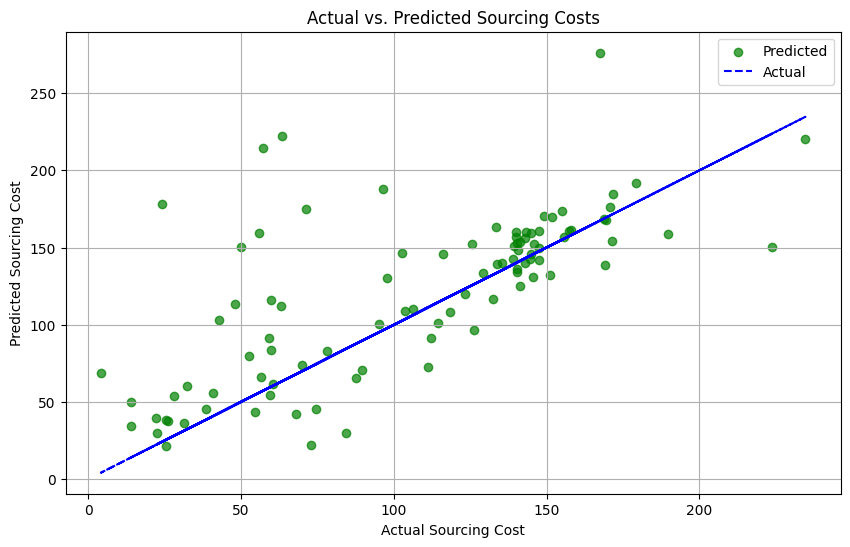

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the test dataset
test_data = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv')

# Extract the actual sourcing costs from the test dataset
actual_costs = test_data['Sourcing Cost']

# Predicted sourcing costs from the model
predicted_costs = np.array([109.1940188, 157.07377265, 156.39620612, 151.25726746, 167.65448073,
                            138.63511732, 113.30152385, 66.44223676, 152.53952328, 160.75220028,
                            132.41040341, 139.62698672, 100.28955435, 136.11881395, 139.72488733,
                            145.86450525, 154.07718225, 153.39961573, 125.05781885, 152.6101565,
                            160.8228335, 134.42560144, 142.63827845, 34.45580432, 83.07148105,
                            39.44376334, 43.19694747, 36.51024588, 30.06494101, 220.00682029,
                            191.66502341, 168.53286322, 49.67079886, 21.19423636, 73.99261435,
                            145.88793446, 173.55216481, 160.20054915, 140.07142927, 116.9596508,
                            61.78348099, 115.79227477, 176.59776241, 184.81043941, 276.21643249,
                            45.22436983, 150.58660241, 158.79927941, 130.45748254, 111.93999232,
                            83.59819544, 149.5663621, 174.88520546, 146.54340858, 187.61199222,
                            178.4974308, 150.15563392, 214.25849342, 222.17072487, 153.27477264,
                            133.42366218, 159.55941963, 131.21762275, 148.66816902, 156.88084602,
                            163.02046394, 142.89134407, 170.55557441, 142.21377754, 169.76611518,
                            159.79423713, 108.13967119, 79.45686175, 68.56558316, 37.32890446,
                            54.60986912, 38.35019505, 96.70896226, 91.5700236, 41.86362109,
                            22.18741846, 45.28453105, 161.68797028, 110.20991242, 65.74141823,
                            119.74039477, 91.3985979, 53.61427999, 30.17757345, 159.2124144,
                            102.95020737, 70.85626225, 101.13558964, 72.79379277, 60.50346537,
                            55.70138842])

# Plot the actual vs. predicted sourcing costs
plt.figure(figsize=(10, 6))
plt.scatter(actual_costs, predicted_costs, color='green', label='Predicted', alpha=0.7)
plt.plot(actual_costs, actual_costs, color='blue', linestyle='--', label='Actual')
plt.title('Actual vs. Predicted Sourcing Costs')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
#random forest regressor 

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

# Load the training dataset
train_data = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv')

# Load the testing dataset
test_data = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv')

# Convert 'Month of Sourcing' column to datetime format
train_data['Month of Sourcing'] = pd.to_datetime(train_data['Month of Sourcing'], format='%b-%y')

# Convert datetime to numeric representation (e.g., number of days since a reference date)
train_data['Month of Sourcing'] = (train_data['Month of Sourcing'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Convert 'Month of Sourcing' column to datetime format
test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')

# Convert datetime to numeric representation (e.g., number of days since a reference date)
test_data['Month of Sourcing'] = (test_data['Month of Sourcing'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Extract features and target variable for training data
X_train = train_data[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']]
y_train = train_data['Sourcing Cost']

# Extract features and target variable for testing data
X_test = test_data[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']]
y_test = test_data['Sourcing Cost']

# Convert categorical variables into dummy/indicator variables for both datasets
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Initialize and fit the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, 'random_forest_regressor_model.pkl')

# Predict on the test set using the trained model
y_pred_test = rf_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test Mean Squared Error:", mse_test)
print("Test Mean Absolute Error:", mae_test)


Test Mean Squared Error: 1064.6981091611933
Test Mean Absolute Error: 16.52135973710835


In [14]:


import pandas as pd
import joblib

# Load the trained Random Forest Regressor model
rf_model = joblib.load('random_forest_regressor_model.pkl')

# Load the test dataset
test_data = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv')

# Convert 'Month of Sourcing' column to datetime format
# test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')

test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')

# Convert datetime to numeric representation (e.g., number of days since a reference date)
test_data['Month of Sourcing'] = (test_data['Month of Sourcing'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Extract features from the test data
X_test = test_data[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']]

# Convert categorical variables into dummy/indicator variables
X_test = pd.get_dummies(X_test, drop_first=True)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Display predicted sourcing costs
print("Predicted Sourcing Cost:")
print(y_pred)


Predicted Sourcing Cost:
[113.53956515 154.18549427 149.62135189 145.51757573 171.03549109
 174.83        49.07558214  56.51989648 150.12950223 149.58106947
 149.99684057 133.3         95.15389992 143.08809086 141.11914189
 146.42950243 164.95494307 143.5310926  143.99572264 150.09291539
 152.73280529 148.26705816 148.24581546  15.15960065  79.3271281
  29.82666969  40.23059076  31.75981691  24.93368234 215.88826079
 189.47122919 170.68983197  31.9967614   26.04658611  70.
 149.63318237 172.4706211  145.3917214  143.95238856 186.3021232
  47.38143105  29.01542668 167.93744889 173.36244576 102.02055919
  38.11998295 215.10571688 212.12874414 106.29446797  72.00219413
  56.52       149.2794566  100.18         1.50614227 179.89396313
 121.13531454 174.12312163 199.20143943 180.75356648 143.52262
 133.77236446 147.57763661 147.7381742  140.73601946 140.39531727
 145.2535263  141.4967579  143.15274774 143.39672388 152.87027699
 148.49052652 114.60105394  74.96240778  32.0971767   66.6924817

In [16]:
#feedforward neural network 

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import joblib

# Load the training dataset
train_data = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv')

# Convert 'Month of Sourcing' column to datetime format
train_data['Month of Sourcing'] = pd.to_datetime(train_data['Month of Sourcing'], format='%b-%y')

# Convert datetime to numeric representation (number of days since a reference date)
train_data['Month of Sourcing'] = (train_data['Month of Sourcing'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')


# Extract features and target variable
X_train = train_data[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']]
y_train = train_data['Sourcing Cost']

# Convert categorical variables into dummy/indicator variables
X_train = pd.get_dummies(X_train, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and fit the Feedforward Neural Network (FNN) model
model_fnn = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)
model_fnn.fit(X_train_scaled, y_train)

# Save the trained model
joblib.dump(model_fnn, 'fnn_model.pkl')


['fnn_model.pkl']

In [17]:
import pandas as pd
import joblib

# Load the test dataset
test_data = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv')

# Convert 'Month of Sourcing' column to datetime format
test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')

# Convert datetime to numeric representation (number of days since a reference date)
test_data['Month of Sourcing'] = (test_data['Month of Sourcing'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Extract features
X_test = test_data[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']]

# Convert categorical variables into dummy/indicator variables
X_test = pd.get_dummies(X_test, drop_first=True)

# Scale the features
X_test_scaled = scaler.transform(X_test)

# Load the trained FNN model
model_fnn = joblib.load('fnn_model.pkl')

# Predict on the test set using the trained model
y_pred_test_fnn = model_fnn.predict(X_test_scaled)

# Print the predicted sourcing costs
print("Predicted Sourcing Cost (FNN):")
print(y_pred_test_fnn)


Predicted Sourcing Cost (FNN):
[130.57755864 181.27628045 149.04817557 145.43801082 162.59231713
 179.65872928  73.29518945  51.57360165 171.80674213 166.79882981
 173.49695641 145.22899978 107.98405097 106.35949812 151.19479458
 168.7202716  161.85100414 145.47880999 148.80658711 180.67411979
 172.17155767 142.31535699 138.4937367   25.65045829  95.77187825
  38.75941385  50.16431298  43.86428992  39.37075273 254.37769895
 213.72390924 153.28901081  49.71767915  28.42380325  97.44408616
 165.16248032 205.97221539 147.52417166 125.72059334 215.81601132
  46.56722877   7.10751584 171.17875365 180.28266263 -39.26739519
  54.47158595 212.27054618 235.442213   122.1050821   77.83817536
  58.31137984 169.52734062  89.42657202  26.60046112 196.0718143
 131.12455785 174.65724387 205.68828769 210.9494611  130.89592826
 152.04838534 170.9914894  161.45340375 157.13314565 153.57317473
 174.35112667 144.9608904  163.34633155 146.43416948 187.04438004
 157.09148557 129.46574105  83.23798041  53.27

In [26]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv')

# Replace 'column_name' with the name of the column you want to extract
column_to_extract = 'Sourcing Cost'

# Extract the content of the specified column and store it in a list
column_content = data[column_to_extract].tolist()

# Print the list
print(column_content)


[103.68, 155.75, 143.02, 139.39, 169.42, 169.15, 47.99, 56.52, 125.51, 157.27, 151.02, 133.83, 95.0, 140.4, 135.4, 116.25, 171.26, 141.14, 141.32, 145.84, 147.54, 140.34, 144.45, 13.98, 78.05, 22.22, 54.47, 31.44, 22.62, 234.71, 179.4, 168.73, 14.01, 25.46, 70.0, 144.89, 155.08, 140.03, 143.08, 132.6, 60.53, 59.75, 170.71, 171.75, 167.43, 38.66, 223.78, 189.59, 97.74, 63.12, 59.82, 147.4, 71.39, 102.73, 96.39, 24.05, 49.96, 57.04, 63.53, 140.31, 129.2, 144.99, 145.42, 140.55, 139.91, 133.44, 139.09, 149.23, 147.59, 151.75, 143.34, 118.24, 52.5, 4.14, 26.12, 59.4, 25.46, 126.28, 112.1, 68.12, 72.82, 74.59, 157.96, 106.3, 87.52, 123.4, 59.05, 27.98, 84.48, 55.81, 42.8, 89.57, 114.57, 111.26, 32.32, 40.73]


In [37]:
#compared the original sourcing costs with the predicted costs from various models (Linear Regression, Random Forest, FNN, XGBoost, LightGBM, LSTM) and calculated their Mean Absolute Error (MAE). 
# Then, we saved the data into a CSV file named 'sourcing_costs_predictions.csv'.

import pandas as pd

# Original sourcing costs
original_costs = [103.68, 155.75, 143.02, 139.39, 169.42, 169.15, 47.99, 56.52, 125.51, 157.27, 151.02, 133.83, 95.0, 140.4, 135.4, 116.25, 171.26, 141.14, 141.32, 145.84, 147.54, 140.34, 144.45, 13.98, 78.05, 22.22, 54.47, 31.44, 22.62, 234.71, 179.4, 168.73, 14.01, 25.46, 70.0, 144.89, 155.08, 140.03, 143.08, 132.6, 60.53, 59.75, 170.71, 171.75, 167.43, 38.66, 223.78, 189.59, 97.74, 63.12, 59.82, 147.4, 71.39, 102.73, 96.39, 24.05, 49.96, 57.04, 63.53, 140.31, 129.2, 144.99, 145.42, 140.55, 139.91, 133.44, 139.09, 149.23, 147.59, 151.75, 143.34, 118.24, 52.5, 4.14, 26.12, 59.4, 25.46, 126.28, 112.1, 68.12, 72.82, 74.59, 157.96, 106.3, 87.52, 123.4, 59.05, 27.98, 84.48, 55.81, 42.8, 89.57, 114.57, 111.26, 32.32, 40.73]

# Predicted sourcing costs from various models
linear_regression_preds = [109.1940188, 157.07377265, 156.39620612, 151.25726746, 167.65448073, 138.63511732, 113.30152385, 66.44223676, 152.53952328, 160.75220028, 132.41040341, 139.62698672, 100.28955435, 136.11881395, 139.72488733, 145.86450525, 154.07718225, 153.39961573, 125.05781885, 152.6101565, 160.8228335, 134.42560144, 142.63827845, 34.45580432, 83.07148105, 39.44376334, 43.19694747, 36.51024588, 30.06494101, 220.00682029, 191.66502341, 168.53286322, 49.67079886, 21.19423636, 73.99261435, 145.88793446, 173.55216481, 160.20054915, 140.07142927, 116.9596508, 61.78348099, 115.79227477, 176.59776241, 184.81043941, 276.21643249, 45.22436983, 150.58660241, 158.79927941, 130.45748254, 111.93999232, 83.59819544, 149.5663621, 174.88520546, 146.54340858, 187.61199222, 178.4974308, 150.15563392, 214.25849342, 222.17072487, 153.27477264, 133.42366218, 159.55941963, 131.21762275, 148.66816902, 156.88084602, 163.02046394, 142.89134407, 170.55557441, 142.21377754, 169.76611518, 159.79423713, 108.13967119, 79.45686175, 68.56558316, 37.32890446, 54.60986912, 38.35019505, 96.70896226, 91.5700236, 41.86362109, 22.18741846, 45.28453105, 161.68797028, 110.20991242, 65.74141823, 119.74039477, 91.3985979, 53.61427999, 30.17757345, 159.2124144, 102.95020737, 70.85626225, 101.13558964, 72.79379277, 60.50346537, 55.70138842]

random_forest_preds = [113.53956515, 154.18549427, 149.62135189, 145.51757573, 171.03549109, 174.83, 49.07558214, 56.51989648, 150.12950223, 149.58106947, 149.99684057, 133.3, 95.15389992, 143.08809086, 141.11914189, 146.42950243, 164.95494307, 143.5310926, 143.99572264, 150.09291539, 152.73280529, 148.26705816, 148.24581546, 15.15960065, 79.3271281, 29.82666969, 40.23059076, 31.75981691, 24.93368234, 215.88826079, 189.47122919, 170.68983197, 31.9967614, 26.04658611, 70.0, 149.63318237, 172.4706211, 145.3917214, 143.95238856, 186.3021232, 47.38143105, 29.01542668, 167.93744889, 173.36244576, 102.02055919, 38.11998295, 215.10571688, 212.12874414, 106.29446797, 72.00219413, 56.52, 149.2794566, 100.18, 1.50614227, 179.89396313, 121.13531454, 174.12312163, 199.20143943, 180.75356648, 143.52262, 133.77236446, 147.57763661, 147.7381742, 140.73601946, 140.39531727, 145.2535263, 141.4967579, 143.15274774, 143.39672388, 152.87027699, 148.49052652, 114.60105394, 74.96240778, 32.0971767, 66.69248177, 55.66869573, 25.76222059, 142.4274739, 97.55345623, 4.8610198, 73.15823059, 43.27232744, 158.70686397, 107.72079331, 71.52955921, 116.04995361, 70.10018201, 32.002465, 31.16613902, 57.1921808, 46.963202, 80.18335395, 120.99122059, 101.26224695, 8.02682462, 50.53715185]

fnn_preds = [130.57755864, 181.27628045, 149.04817557, 145.43801082, 162.59231713, 179.65872928, 73.29518945, 51.57360165, 171.80674213, 166.79882981, 173.49695641, 145.22899978, 107.98405097, 106.35949812, 151.19479458, 168.7202716, 161.85100414, 145.47880999, 148.80658711, 180.67411979, 172.17155767, 142.31535699, 138.4937367, 25.65045829, 95.77187825, 38.75941385, 50.16431298, 43.86428992, 39.37075273, 254.37769895, 213.72390924, 153.28901081, 49.71767915, 28.42380325, 97.44408616, 165.16248032, 205.97221539, 147.52417166, 125.72059334, 215.81601132, 46.56722877, 7.10751584, 171.17875365, 180.28266263, -39.26739519, 54.47158595, 212.27054618, 235.442213, 122.1050821, 77.83817536, 58.31137984, 169.52734062, 89.42657202, 26.60046112, 196.0718143, 131.12455785, 174.65724387, 205.68828769, 210.9494611, 130.89592826, 152.04838534, 170.9914894, 161.45340375, 157.13314565, 153.57317473, 174.35112667, 144.9608904, 163.34633155, 146.43416948, 187.04438004, 157.09148557, 129.46574105, 83.23798041, 53.27684347, 35.89789348, 65.02129437, 41.17519385, 152.00

, 104.89405662, 17.45399106, 100.8747784, 49.86470248, 194.25686609, 135.95250654, 78.86578442, 100.17854773, 77.54518458, 54.02983783, 49.14800731, 27.65641785, 18.95416456, 72.82704282, 147.56963438, 130.51660448, 31.71659589, 56.19120645]

xgboost_preds = [112.53496, 153.59299, 149.86044, 145.43594, 169.56429, 173.7738, 48.40108, 66.15772, 150.14774, 149.32771, 149.61943, 133.9744, 94.659904, 141.45634, 140.92635, 151.98058, 156.44974, 142.05586, 142.71555, 149.45415, 150.64648, 147.1959, 147.82664, 17.159203, 79.719734, 32.06247, 33.8921, 30.179289, 24.637184, 216.41849, 189.73964, 170.93263, 32.944557, 25.22425, 69.16799, 150.20833, 170.91917, 145.28969, 144.02716, 183.52249, 47.938313, 35.7663, 170.78976, 173.05342, 102.269516, 41.178024, 211.37619, 212.7497, 108.35295, 72.27743, 57.020947, 149.30782, 97.75054, 26.040003, 179.89725, 125.62097, 173.38013, 199.1317, 185.20116, 143.21678, 130.50778, 148.262, 148.03319, 142.9592, 143.99173, 143.86136, 143.62859, 143.0835, 145.05606, 152.28763, 148.02864, 114.191795, 72.61399, 33.9718, 63.71227, 55.20187, 25.908846, 141.47995, 93.2865, 6.495615, 71.57892, 40.87667, 158.1807, 108.0876, 70.43418, 118.51166, 67.01067, 30.577536, 27.66268, 60.786407, 53.061333, 74.87136, 123.76655, 99.51181, 12.353122, 49.763363]

lightgbm_preds = [111.87988611, 153.69420111, 153.38247842, 144.37636632, 168.57736791, 171.05996081, 53.90709126, 61.67959004, 146.19531602, 146.19531602, 146.81551464, 134.7860545, 95.93801217, 142.12272701, 142.12272701, 149.20031568, 150.31068258, 144.41166615, 143.19877539, 150.12783321, 150.40349601, 145.67641876, 145.67641876, 22.03150276, 79.14193391, 32.90811574, 23.42250899, 30.79224679, 25.30213589, 219.20916952, 185.65915776, 166.96875094, 31.77966854, 24.58481237, 66.86403181, 150.19562697, 160.77241912, 145.8825077, 144.09164729, 181.37266234, 53.53490778, 41.86695227, 171.11442223, 171.1653136, 104.85864409, 40.77481057, 210.87553401, 211.72042837, 107.01929289, 70.70078709, 60.98523072, 148.27 ,

101.05562309, 29.25162288, 179.70964195, 118.21643828, 173.42265741, 199.81043862, 183.28117189, 144.00967645, 134.16899215, 148.199734, 148.22756257, 142.33140442, 143.2237453, 145.63224357, 142.68015147, 144.28518426, 144.06111991, 151.46739889, 147.23557253, 112.59066708, 73.24015814, 30.21873591, 56.45094367, 55.03131276, 24.92602463, 140.77742602, 94.60101709, 6.11565024, 76.21274302, 40.64232564, 160.92044024, 110.51042982, 71.63052584, 118.27747002, 68.20156333, 31.44222522, 26.66452755, 58.14680853, 53.68132598, 77.8317357, 122.10018194, 99.11800795, 9.36574505, 48.8540251]

lstm_predicted_costs = [99.13885, 192.01881, 153.47037, 81.35604, 209.80069, 196.60461, -53.82884, 260.78122, 137.4304, 123.73364, 
                        135.82503, 139.08064, 99.64279, 149.5563, 157.37057, 143.38748, 186.63239, 181.55829, 175.15805, 155.36014, 
                        165.82463, 162.27151, 152.15945, 43.595497, 70.88196, 56.683662, 22.850994, 34.72728, -55.321156, 228.13925, 
                        186.16585, 67.50853, 40.711597, 39.150185, 87.442154, 201.51492, 160.98813, 141.93672, 100.16466, 89.88121, 
                        60.805717, 212.29596, 152.41937, 199.59721, 346.4186, 76.85771, 208.5415, 178.23822, 60.94246, 172.54579, 
                        133.08043, 137.01556, 114.02966, 97.7966, 191.28946, 310.26187, 219.99045, 396.26486, 349.96753, 146.64389, 
                        6.0257072, 140.995, 134.3916, 149.6194, 140.2326, 160.34662, 161.4041, 197.40384, 191.13861, 156.87213, 
                        178.63332, 87.88608, 63.93743, 72.33864, -3.0318718, 52.652306, 32.290936, 116.36516, 64.948296, 30.928923, 
                        -49.816845, 37.46592, 166.08145, 165.51118, 15.111622, 122.86629, 63.733818, 20.847713, 7.1368637, 188.44104, 
                        168.18018, 76.89017, 111.83467, 76.68502, 82.995605, 24.90028]

# Create DataFrame
df = pd.DataFrame({
    'Original Cost': original_costs,
    'Linear Regression Predicted Cost': linear_regression_preds,
    'Random Forest Predicted Cost': random_forest_preds,
    'FNN Predicted Cost': fnn_preds,
    'XGBoost Predicted Cost': xgboost_preds,
    'LightGBM Predicted Cost': lightgbm_preds ,
    'lstm_predicted_costs': lstm_predicted_costs
})

# Calculate Mean Absolute Error for each model
mae_linear_regression = (df['Original Cost'] - df['Linear Regression Predicted Cost']).abs().mean()
mae_random_forest = (df['Original Cost'] - df['Random Forest Predicted Cost']).abs().mean()
mae_fnn = (df['Original Cost'] - df['FNN Predicted Cost']).abs().mean()
mae_xgboost = (df['Original Cost'] - df['XGBoost Predicted Cost']).abs().mean()
mae_lightgbm = (df['Original Cost'] - df['LightGBM Predicted Cost']).abs().mean()
mae_lstm= (df['Original Cost'] - df['lstm_predicted_costs']).abs().mean()

# Print MAE for each model
print(f"Mean Absolute Error (MAE) for Linear Regression: {mae_linear_regression}")
print(f"Mean Absolute Error (MAE) for Random Forest: {mae_random_forest}")
print(f"Mean Absolute Error (MAE) for FNN: {mae_fnn}")
print(f"Mean Absolute Error (MAE) for XGBoost: {mae_xgboost}")
print(f"Mean Absolute Error (MAE) for LightGBM: {mae_lightgbm}")
print(f"Mean Absolute Error (MAE) for LSTM: {mae_lstm}")
# Write DataFrame to CSV
df.to_csv('sourcing_costs_predictions.csv', index=False)


Mean Absolute Error (MAE) for Linear Regression: 27.025402310208335
Mean Absolute Error (MAE) for Random Forest: 16.521359737500003
Mean Absolute Error (MAE) for FNN: 28.4248518565625
Mean Absolute Error (MAE) for XGBoost: 16.68489940625
Mean Absolute Error (MAE) for LightGBM: 16.430450564791666
Mean Absolute Error (MAE) for LSTM: 46.96455821770834


In [38]:
pd.read_csv('sourcing_costs_predictions.csv')

,Original Cost,Linear Regression Predicted Cost,Random Forest Predicted Cost,FNN Predicted Cost,XGBoost Predicted Cost,LightGBM Predicted Cost,lstm_predicted_costs
0,103.68,109.194019,113.539565,130.577559,112.534960,111.879886,99.138850
1,155.75,157.073773,154.185494,181.276280,153.592990,153.694201,192.018810
2,143.02,156.396206,149.621352,149.048176,149.860440,153.382478,153.470370
3,139.39,151.257267,145.517576,145.438011,145.435940,144.376366,81.356040
4,169.42,167.654481,171.035491,162.592317,169.564290,168.577368,209.800690
...,...,...,...,...,...,...,...
91,89.57,70.856262,80.183354,72.827043,74.871360,77.831736,76.890170
92,114.57,101.135590,120.991221,147.569634,123.766550,122.100182,111.834670
93,111.26,72.793793,101.262247,130.516604,99.511810,99.118008,76.685020
94,32.32,60.503465,8.026825,31.716596,12.353122,9.365745,82.995605


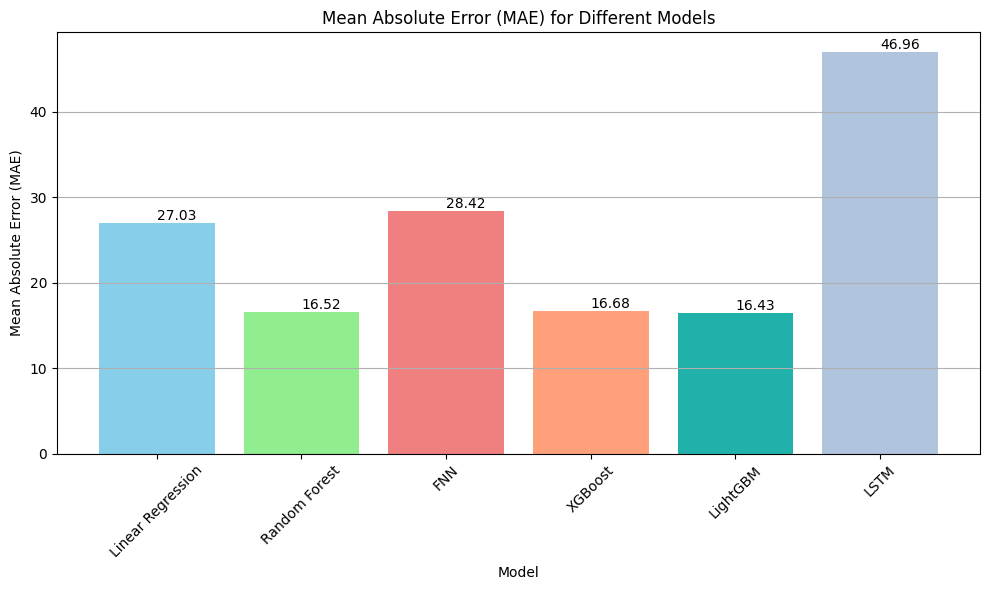

In [41]:
import matplotlib.pyplot as plt

# Mean Absolute Error values
mae_values = [27.025402310208335, 16.521359737500003, 28.4248518565625, 16.68489940625, 16.430450564791666, 46.96455821770834]
models = ['Linear Regression', 'Random Forest', 'FNN', 'XGBoost', 'LightGBM', 'LSTM']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'lightsteelblue']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mae_values, color=colors)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) for Different Models')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Show plot
plt.tight_layout()
plt.show()

#model with the least MAE --> is the one with the highest matching accuracy 
